<a href="https://colab.research.google.com/github/lijp16/lijp16/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
from torch import nn
import matplotlib.pyplot as plt

###PyTorch Workflow
1. data(prepare and load)
2. build model
3. fitting model to data(training)
4. improve model with experimentation
5. making prediction and evaluating a model
6. saving and loading a model

In [15]:
torch.__version__

'2.4.1+cu121'

## 1. data preparing and loading

type
* text
* audio
* videos
* dna
* images
* excel sheets

ml in 2 parts:
1. get data into number
2. built model to find pattern


use linear regression

In [16]:
#create *known* parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight*X + bias

X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [17]:
len(X),len(Y)

(50, 50)

In [18]:
# split data into training set, validation set(not always) and test set

train_split = int(0.8*len(X))
X_train,Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split:]

len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

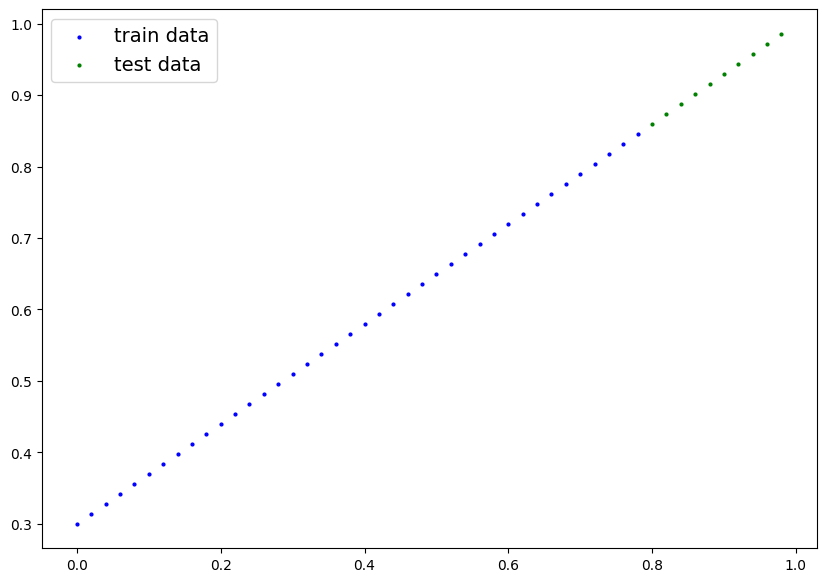

In [23]:
#visualize data

def plot_predictions(train_data = X_train,
                     train_lables = Y_train,
                     test_data = X_test,
                     test_lables = Y_test,
                     predictions = None):
  """
  Plots training data, test data and comepare predictions
  """
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_lables, c="b", s=4, label="train data")
  plt.scatter(test_data, test_lables, c="g", s=4, label="test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  plt.legend(prop={"size":14});

plot_predictions()

In [24]:
# bulid linear regression model

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias